## Learn igraph


https://gist.github.com/rbnvrw/c2424fe3ff812da892a0

### simple-graph.py

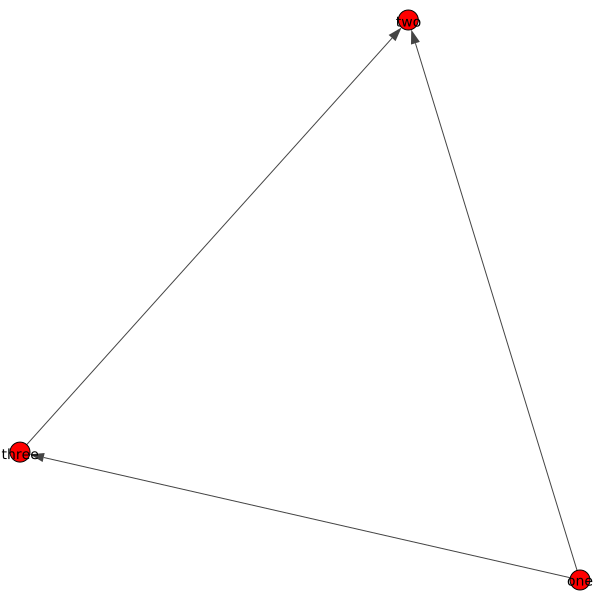

In [1]:
from igraph import *

vertices = ["one", "two", "three"]
edges = [(0,2),(2,1),(0,1)]

g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=True)

plot(g)

### styling_graph.py

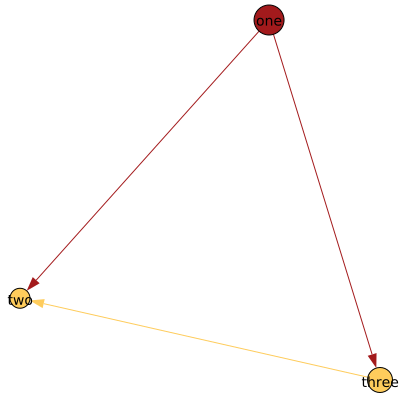

In [3]:
from igraph import *
import numpy as np

# Create the graph
vertices = ["one", "two", "three"]
edges = [(0,2),(2,1),(0,1)]

g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=True)

visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*10+20 for x in outdegree]

# Set bbox and margin
visual_style["bbox"] = (400,400)
visual_style["margin"] = 20

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]
        
# Don't curve the edges
visual_style["edge_curved"] = False
        
# Plot the graph
plot(g, **visual_style)

### community_detection.py

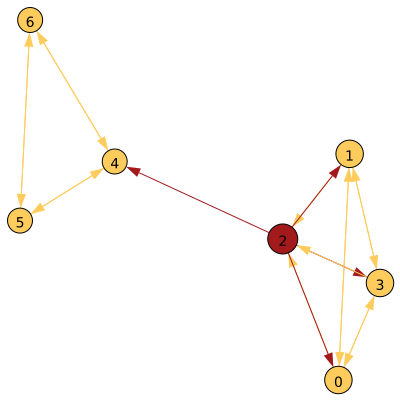

In [9]:
from igraph import *
import numpy as np

# Create the graph
vertices = list(range(7)) # [i for i in range(7)]
edges = [(0,2),(0,1),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2),(2,4),(4,5),(4,6),(5,4),(5,6),(6,4),(6,5)]

g = Graph(vertex_attrs={"label":vertices}, edges=edges, directed=True)

visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
# visual_style["vertex_size"] = [x/max(outdegree)*25+50 for x in outdegree]

# # Set bbox and margin
# visual_style["bbox"] = (800,800)
# visual_style["margin"] = 100

visual_style["vertex_size"] = [x/max(outdegree)*10+20 for x in outdegree]

# Set bbox and margin
visual_style["bbox"] = (400,400)
visual_style["margin"] = 20

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]
        
# Don't curve the edges
visual_style["edge_curved"] = False

# Community detection
communities = g.community_edge_betweenness(directed=True)
clusters = communities.as_clustering()

# Set edge weights based on communities
weights = {v: len(c) for c in clusters for v in c}
g.es["weight"] = [weights[e.tuple[0]] + weights[e.tuple[1]] for e in g.es]

# Choose the layout
N = len(vertices)
# visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"],  maxiter=1000,area=N**3, repulserad=N**3)
visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"])
        
# Plot the graph
plot(g, **visual_style)